In [1]:
%time
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import csv

df = pd.read_csv('C:\pandasfile\TEST-batnova.txt', names=['Timestamp','I_atual','V_atual','ciclo_rodada','cap_mWh'])


df

Wall time: 0 ns


,Timestamp,I_atual,V_atual,ciclo_rodada,cap_mWh
0,0,-7.3,0.900,0,0.001
1,1,183.1,1.504,0,0.077
2,2,180.1,1.532,0,0.154
3,3,179.1,1.552,0,0.231
4,4,178.1,1.564,0,0.309
...,...,...,...,...,...
287125,2015,139.1,2.032,15,156.945
287126,2016,139.3,2.028,15,157.024
287127,2017,139.0,2.028,15,157.102
287128,2018,138.9,2.028,15,157.180


In [2]:
s1=pd.Series([0,0])
cols=["inicio","fim"]#DECLARA TEMPOS_INICIO_FIM
TEMPOS_INICIO_FIM= pd.DataFrame([list(s1)],columns=cols)


main_index=0
w=np.shape(df)
z=w[0]#Pega o tamanho do dataframe
#z

while True:
    
    index_inicial_carga_atual=main_index
    

    while True:
        index_final_carga_atual=main_index   
        
        tempoanterior=df.Timestamp[main_index] #pega a timestampp e ve se ela zerou
        main_index=main_index+1#pega a timestampp e ve se ela zerou
        tempo=df.Timestamp[main_index]#pega a timestampp e ve se ela zerou
        
        
        if main_index>z-500: #limita execução do programa até o tamanho do dataframe -500
                break
    
        if tempo<tempoanterior: #aconteceu um reinicio to na contagem do timestamp?
          
            index_final_carga_atual=main_index#quando o break estourar este sera o index final da carga atual no dataframe dos dados brutos
           
            nova_linha=[index_inicial_carga_atual+1,index_final_carga_atual]#constroi-se o lista contendo o inicio e o fim de cada carga/descarga
                                                                           #no caso alinha do dataframe 
            novo_incio_fim=pd.DataFrame([nova_linha],columns=cols)#aqui a lista se transforma em dataframe
          
            TEMPOS_INICIO_FIM = pd.concat([TEMPOS_INICIO_FIM, novo_incio_fim], ignore_index=True)#concatena indices contendo o inicio e o fim de cada carga/descarga
                                                                                    # de maneira a formar o dataframe onde cada linha contem o inicio numa coluna e o fim em outra coluna de cada cicli de carga descarga
            break
    if main_index>z-500: #limita execução do programa
                break
            
TEMPOS_INICIO_FIM.to_csv('C:\pandasfile\limites_decarga.csv', index=False)#exporta pa CSV sem a coluna de indeces
dados_novos=pd.read_csv('C:\pandasfile\limites_decarga.csv')

            
print(dados_novos)# variavel com o index de cada iniciofim de cargadescarga

    inicio     fim
0        0       0
1        1    8454
2     8455   23252
3    23253   24289
4    24290   34011
5    34012   35210
6    35211   45197
7    45198   46722
8    46723   57070
9    57071   58590
10   58591   61291
11   61292   63195
12   63196   76422
13   76423   78322
14   78323   89519
15   89520   92144
16   92145  103444
17  103445  106010
18  106011  117453
19  117454  120013
20  120014  132082
21  132083  134472
22  134473  148817
23  148818  151155
24  151156  163954
25  163955  166431
26  166432  178346
27  178347  180802
28  180803  192598
29  192599  195038
30  195039  206676
31  206677  209155
32  209156  224313
33  224314  226802
34  226803  241094
35  241095  243547
36  243548  256274
37  256275  258744
38  258745  270591
39  270592  273090
40  273091  285110


In [3]:
#import pandas as pd
#from pandas import DataFrame
#import matplotlib.pyplot as plt
#import numpy as np
#import math
#import csv

df = pd.read_csv('C:\pandasfile\TEST-batnova.TXT', names=['Timestamp','I_atual','V_atual','ciclo_rodada','cap_mWh'])
dados_novos=pd.read_csv('C:\pandasfile\limites_decarga.csv')


dados_novos

,inicio,fim
0,0,0
1,1,8454
2,8455,23252
3,23253,24289
4,24290,34011
5,34012,35210
6,35211,45197
7,45198,46722
8,46723,57070
9,57071,58590


In [4]:
i=1
y=i+1
ciclo_teste=df.iloc[dados_novos['inicio'][i]:dados_novos['fim'][y] , 1:5] #le a df principal no intervalo especificado
descricao=ciclo_teste['cap_mWh'].describe()#usa describe para pegar valores maximos e minimos de capacidade
ciclo_teste
descricao
np.shape(dados_novos)

(41, 2)

In [5]:
#del descarga_carga
tamanho_dados_novos=np.shape(dados_novos)
descricao=ciclo_teste['cap_mWh'].describe()
cols=["Descarga_mWh","Carga_mWh","eff%"]
descarga_carga= pd.DataFrame(data=[[0,0,0]],columns=cols)

for i in range (1,(tamanho_dados_novos[0]-1),2):
    y=i+1
    ciclo_teste=df.iloc[dados_novos['inicio'][i]:dados_novos['fim'][y] , 1:5] #le a df principal no intervalo especificado

    descricao=ciclo_teste['cap_mWh'].describe()#usa describe para pegar valores maximos e minimos de capacidade
    descarga_carga_linha= pd.DataFrame(data=[[descricao[3], descricao[7],(-100*descricao[3]/descricao[7])]],columns=cols)
    descarga_carga=pd.concat([descarga_carga,descarga_carga_linha], ignore_index=True)
    

    
#descarga  descricao[3]
descricao
descarga_carga

,Descarga_mWh,Carga_mWh,eff%
0,0.000,0.000,0.000000
1,-38.902,523.245,7.434758
2,-24.514,80.022,30.634076
3,-24.284,80.000,30.355000
4,-26.954,80.046,33.673138
5,-9.780,80.007,12.223930
6,-35.113,150.003,23.408199
7,-29.267,150.046,19.505352
8,-29.218,200.040,14.606079
9,-28.139,200.033,14.067179


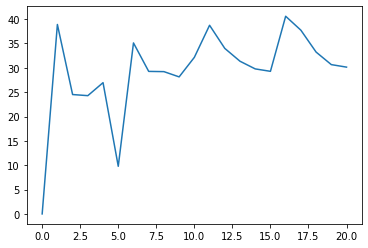

count    21.000000
mean     29.229429
std       9.382299
min      -0.000000
25%      28.139000
50%      30.143000
75%      33.990000
max      40.592000
Name: Descarga_mWh, dtype: float64
0


In [6]:
#lista sequencial de descargas

for i in range(np.shape(descarga_carga)[0]):
    descarga_carga["Descarga_mWh"][i]=descarga_carga["Descarga_mWh"][i]*-1

tres_vezes_std=(descarga_carga['Descarga_mWh'].describe())
tres_vezes_std[2]=(tres_vezes_std[2])*3

descarga_carga.loc[descarga_carga['Descarga_mWh']>400]=0 #filtra outliers descarga maxima
x=range(np.shape(descarga_carga)[0])
y=descarga_carga['Descarga_mWh'].to_numpy()#transforma array para usar na plot
plt.plot(x,y)
plt.show()
print(descarga_carga['Descarga_mWh'].describe())
print(np.argmin(descarga_carga['Descarga_mWh']))

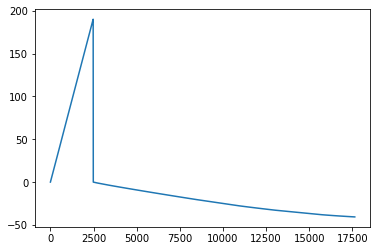

32
31
32
40.592
16


In [7]:
i=0
w=0
a=0
a=np.argmax(descarga_carga['Descarga_mWh'])
#a=287
a=a*2
i=a-1
w=a
ciclo_teste=df.iloc[dados_novos['inicio'][i]:dados_novos['fim'][w] , 1:5] #le a df principal no intervalo especificado
elementos_ciclo=np.shape(ciclo_teste)
numero=elementos_ciclo[0]

y=ciclo_teste['cap_mWh'].to_numpy()#transforma array para usar na plot
x=range(numero)


plt.plot(x, y)
plt.show()
print(a)
print(i)
print(w)

print(np.max(descarga_carga['Descarga_mWh']))
print(np.argmax(descarga_carga['Descarga_mWh']))

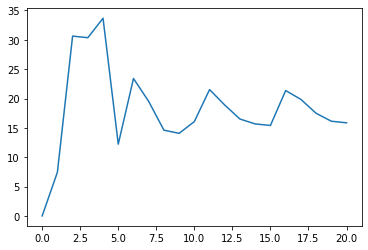

count    21.000000
mean     18.125775
std       7.547706
min       0.000000
25%      15.410647
50%      16.498882
75%      21.356342
max      33.673138
Name: eff%, dtype: float64


In [8]:
descarga_carga.loc[descarga_carga['eff%']>70]=0 #filtra outliers 
x=range(np.shape(descarga_carga)[0])
y=descarga_carga['eff%'].to_numpy()#transforma array para usar na plot
plt.plot(x,y)
plt.show()
print(descarga_carga['eff%'].describe())

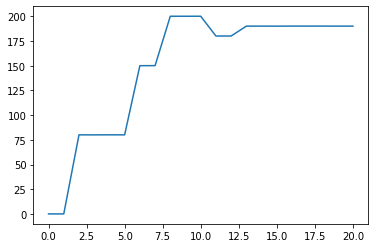

count     21.000000
mean     147.651190
std       65.809809
min        0.000000
25%       80.046000
50%      190.005000
75%      190.058000
max      200.040000
Name: Carga_mWh, dtype: float64
400.0


In [9]:
tres_vezes_std=(descarga_carga['Carga_mWh'].describe())
tres_vezes_std[2]=(tres_vezes_std[2])*3
tres_vezes_std[2]=400
descarga_carga.loc[descarga_carga['Carga_mWh']>tres_vezes_std[2]]=0 #filtra outliers 
x=range(np.shape(descarga_carga)[0])
y=descarga_carga['Carga_mWh'].to_numpy()#transforma array para usar na plot
plt.plot(x,y)
plt.show()
descarga_carga['Carga_mWh'].describe()
print(descarga_carga['Carga_mWh'].describe())
print(tres_vezes_std[2])